# Identifying Patterns and Establishing Correlations

In this part of Project 2, we will analyze time series data for natural gas to identify any correlations among natural gas price, ambient temperature, natural gas consumption, storage and LNG exports.


#### Set Up and Visualize the Data

1. Read the time series data into Pandas DataFrame, `df_ng`. Set the “date” column as the index for the DataFrame.

2. Later Later Later

3. Later Later Later
    

#### Correlations and HeatMap

1. Use the Pandas `corr` function to compute the correlations among natural gas price, ambient temperature, natural gas consumption, storage and LNG exports.

2. HeatMap

References:

[Pandas corr function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)


In [12]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
import numpy as np
from path import Path
%matplotlib inline

## Set up and Visualize the Data

### Step 1: Read the time series data into Pandas DataFrame, `df_ng`. Set the “date” column as the index for the DataFrame.

In [13]:
# Read the data from the correlation.csv file into a Pandas DataFrame
df_ng = pd.read_csv(
    Path("Resources/correlation.csv"), 
    index_col="Date", 
    parse_dates=True, 
    infer_datetime_format=True
)

# Review the DataFrame
df_ng.head()

,Price,Temperature,Consumption,Storage,Exports
Date,,,,,
2012-01-15,2.67,36.12,2756180,2910007,6199
2012-02-15,2.51,37.51,2500654,2448810,1880
2012-03-15,2.17,50.41,2127761,2473130,2615
2012-04-15,1.95,54.68,1953071,2611226,18
2012-05-15,2.43,63.45,1873835,2887060,2811


#### Step 2: Create the `df_ng_1` DataFrame from `df_ng` DataFrame, to include Price and Temperature variables. Use hvplot to visualize the time series data.

In [14]:
df_ng_1 = df_ng[["Price"]]
display(df_ng_1.head())
df_ng_1.hvplot()

,Price
Date,
2012-01-15,2.67
2012-02-15,2.51
2012-03-15,2.17
2012-04-15,1.95
2012-05-15,2.43


:Curve   [Date]   (Price)

### Step 3: Create the `df_ng_2` DataFrame from `df_ng` DataFrame, to include Price and Temperature variables. Use hvplot to visualize the time series data.

In [15]:
# Use hvplot to visualize the time series data
df_ng_2 = df_ng[["Temperature"]]
display(df_ng_2.head())
df_ng_2.hvplot()

,Temperature
Date,
2012-01-15,36.12
2012-02-15,37.51
2012-03-15,50.41
2012-04-15,54.68
2012-05-15,63.45


:Curve   [Date]   (Temperature)

### Step 4: Create the `df_ng_3` DataFrame from `df_ng` DataFrame, to include Consumption, Storage and Exports variables. Use hvplot to visualize the time series data.

In [16]:
# Use hvplot to visualize the time series data
df_ng_3 = df_ng[["Consumption", "Storage", "Exports"]]
display(df_ng_3.head())
df_ng_3.hvplot()

,Consumption,Storage,Exports
Date,,,
2012-01-15,2756180,2910007,6199
2012-02-15,2500654,2448810,1880
2012-03-15,2127761,2473130,2615
2012-04-15,1953071,2611226,18
2012-05-15,1873835,2887060,2811


:NdOverlay   [Variable]
   :Curve   [Date]   (value)

## Correlations and HeatMap

### Step 1: Use the Pandas `corr` function to compute the correlations among natural gas price, ambient temperature, natural gas consumption, storage and LNG exports.

In [17]:
# Use the corr function to compute the correlation between the lagged Google Trends data, price returns, and stock volatility
df_corr=df_ng[["Price", "Temperature", "Consumption", "Storage", "Exports"]].corr()
df_corr

,Price,Temperature,Consumption,Storage,Exports
Price,1.000000,-0.129785,0.041670,-0.181988,-0.009232
Temperature,-0.129785,1.000000,-0.767163,0.272562,-0.085410
Consumption,0.041670,-0.767163,1.000000,-0.260285,0.386584
Storage,-0.181988,0.272562,-0.260285,1.000000,-0.006339
Exports,-0.009232,-0.085410,0.386584,-0.006339,1.000000


### Step 2: Generate HeatMap

In [18]:
# !pip install seaborn
import seaborn as sns

<AxesSubplot:>

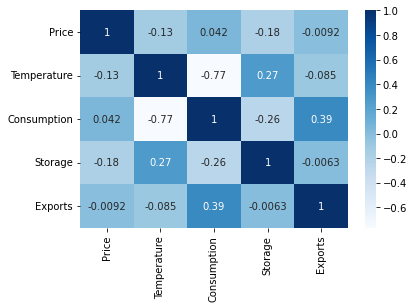

In [19]:
sns.heatmap(df_corr, annot=True, cmap='Blues')